<a href="https://colab.research.google.com/github/ajankowski/in_progress/blob/main/box_diet_multi_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the data

The dataset used is hosted on Kaggle:  
https://www.kaggle.com/warsawconcept/box-diet-warsaw-concept

# Imports

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import itertools
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
print(tf.__version__)

2.7.0


# Reading and cleaning the data

In [3]:
# df = pd.read_excel('box_diet.xlsx', skiprows=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # reading original file
df = pd.read_excel('new_box_diet.xlsx') # reading new file
df.pop('Unnamed: 0')
print(f'data shape: {df.shape}')

data shape: (842, 36)


In [4]:
col = list(df.columns)

In [5]:
df_int = df.copy()
df_int = df_int.drop(['Height', 'Weight'], 1)

In [6]:
# function to clean a column (replace data and set column data type)

def clean_column(data_frame, column_name, to_replace, replacement, data_type):
    data_frame[column_name].loc[(data_frame[column_name]==to_replace)] = replacement
    data_frame[column_name] = data_frame[column_name].astype(data_type)

In [7]:
clean_column(df_int, 'Diet- number of meals', 'lunch-box', 1, int)
clean_column(df_int, 'Do you have a personalized diet created by a dietitian?', 'yes ', 'yes', str)
clean_column(df_int, 'Family size', 'single', 1 , int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# Categories (targets)

``` 
'Age', 
'Gender', 
'Marital Status', 
'Occupation', 
'Monthly Income',
'Educational Qualifications', 
' Place of residence', 
'Family size'
```

# Preparing data and targets

[Text(0.5, 1.0, 'Age distribution')]

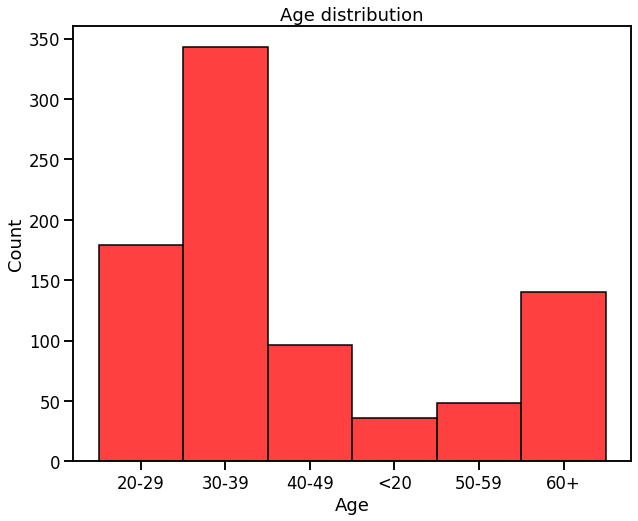

In [8]:
#df.info()
#df.nunique()
# Checking and visualizing the type of distribution of a feature column

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
sns.histplot(df['Age'], ax=ax1 , color ='red')
ax1.set(title='Age distribution')
#sns.barplot(df['Age'], ax=ax2, color='blue')
#sns.barplot(x = 'Age', y = 'Diet - amount of calories', data = df,  saturation=0.70)
#ax2.set(title='Quantile quantile plot')

In [9]:
 df_int.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Place of residence,Family size,BMI - We will calculate and divide into categories,Diet - amount of calories,Diet Type,For which period the order was placedn -order,Diet- number of meals,Motivation to choose a diet,Physical activity,Special needs,Do you find it cheaper than cooking at home?,Do you find it easier and more convenient than preparing meals at home?,Do you find it a time saving alternative,What type of payment you select?,Do you value more diet offers and flexibility in changing them and are you ready to pay for it ?,Is the food of the same or better quality as in the restaurant?,Do you value box diet from health concern perspective ?,Do you see problem with offered delivery times and are you ready to pay for this ?,Do you walue diversity in the menu and you ready to pay for this ?,Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?,Do you value the possibility of replace the meals and are you ready to pay for this ?,"How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?",How did you hear about this kind of service?,Do you combine this diet with a special training program?,Do you have a personalized diet created by a dietitian?,How long are you going to use a diet,Are you going to extend it ?,Would you recommend this type of food to others?
0,20-29,Famale,Single,Corporation,3000$ +,Master's or PhD,"A large city with over 100,000 residents",1,18.732782,1600,vegan,month,5,I want to eat healthy,average activity,I have no special needs,agree,neutral,agree,Blik or PayPal,strongly agree,agree,strongly agree,neutral,agree,agree,strongly agree,strongly agree,Internet,Yes,Yes,6+ months,neutral,Yes
1,30-39,Male,Related,Corporation,3000$ +,Master's or PhD,"A large city with over 100,000 residents",3,23.510204,1800,traditional,5 days,5,I want to eat healthy,average activity,I have no special needs,neutral,strongly agree,stongly agree,Blik or PayPal,neutral,strongly agree,strongly agree,neutral,disagree,agree,agree,strongly agree,friend recommendation,No,No,almost 3 months,agree,Yes
2,30-39,Famale,Related,Administration - Service,1501$-2000$,Master's or PhD,"City from 15,000 up to 100,000 residents",4,27.636054,1600,cleansing,7 days,5,I want to lose weigh,average activity,without meat,disagree,strongly agree,stongly agree,Bank transfer,strongly agree,neutral,strongly agree,disagree,strongly agree,strongly agree,strongly agree,strongly agree,friend recommendation,Yes,Yes,one month,strongly agree,Yes
3,40-49,Famale,Related,Small business,2500$-3000$,Bachelor's or equivalent,"City from 15,000 up to 100,000 residents",4,19.151192,1600,wegetarian,5 days,5,I want to eat healthy,high activity,without meat,agree,agree,agree,Credit card,agree,agree,agree,neutral,agree,agree,neutral,strongly agree,article,Yes,Yes,3-6 months,strongly agree,Yes
4,30-39,Male,Related,Self-employed,3000$ +,Master's or PhD,"A large city with over 100,000 residents",3,28.666129,1800,traditional,7 days,5,I want to lose weigh,very low activity,I have no special needs,strongly agree,strongly agree,stongly agree,Credit card,strongly agree,strongly agree,strongly agree,strongly disagree,agree,agree,neutral,strongly agree,Internet,Yes,Yes,almost 3 months,neutral,Yes


In [10]:
 df_int.keys()

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', ' Place of residence', 'Family size',
       'BMI - We will calculate and divide into categories',
       'Diet - amount of calories', 'Diet Type ',
       'For which period the order was placedn -order',
       'Diet- number of meals', 'Motivation to choose a diet',
       'Physical activity', 'Special needs',
       'Do you find it  cheaper than cooking at home?',
       'Do you find it easier and more convenient than preparing meals at home?',
       'Do you find it a time saving alternative',
       'What type of payment you select?',
       'Do you value more diet offers and flexibility in changing them and are you ready to pay for it ?',
       'Is the food of the same or better quality as in the restaurant?',
       'Do you value  box diet from health concern perspective ?',
       'Do you see problem with  offered delivery times and are you ready to pay for this ?',
  

In [11]:
columns=['Diet Type ',
       'For which period the order was placedn -order',
        'Motivation to choose a diet',
       'Physical activity', 'Special needs',
       'Do you find it  cheaper than cooking at home?',
       'Do you find it easier and more convenient than preparing meals at home?',
       'Do you find it a time saving alternative',
       'What type of payment you select?',
       'Do you value more diet offers and flexibility in changing them and are you ready to pay for it ?',
       'Is the food of the same or better quality as in the restaurant?',
       'Do you value  box diet from health concern perspective ?',
       'Do you see problem with  offered delivery times and are you ready to pay for this ?',
       'Do you walue diversity in the menu and you ready to pay for this ?',
       'Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?',
       'Do you value the possibility of replace the meals and are you ready to pay for this  ?',
       'How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?',
       'How did you hear about this kind of service?',
       'Do you combine this diet with a special training program?',
       'Do you have a personalized diet created by a dietitian?',
       'How long are you going to use a diet', 'Are you going to extend it ? ',
       'Would you recommend this type of food to others?']

In [12]:
 #changing categorical data to one-hot encoding
dane_one = pd.get_dummies(df_int, columns=columns, prefix=columns)

In [13]:
  dane_one

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Place of residence,Family size,BMI - We will calculate and divide into categories,Diet - amount of calories,Diet- number of meals,Diet Type _ cleansing,Diet Type _ traditional,Diet Type _ vegan,Diet Type _gluten free,Diet Type _lactose free,Diet Type _sport,Diet Type _traditional,Diet Type _vegan,Diet Type _wegetarian,For which period the order was placedn -order_5 days,For which period the order was placedn -order_7 days,For which period the order was placedn -order_month,Motivation to choose a diet_I want to build muscle,Motivation to choose a diet_I want to eat healthy,Motivation to choose a diet_I want to gain weight,Motivation to choose a diet_I want to lose weigh,Physical activity_average activity,Physical activity_high activity,Physical activity_low activity,Physical activity_sedentary lifestyle,Physical activity_very high activity,Physical activity_very low activity,Special needs_I don't eat legumes,Special needs_I have no special needs,Special needs_i don't eat dairy,Special needs_no gluten and lactose,Special needs_no meat and fish,Special needs_without meat,Do you find it cheaper than cooking at home?_agree,...,Do you see problem with offered delivery times and are you ready to pay for this ?_strongly disagree,Do you walue diversity in the menu and you ready to pay for this ?_agree,Do you walue diversity in the menu and you ready to pay for this ?_disagree,Do you walue diversity in the menu and you ready to pay for this ?_neutral,Do you walue diversity in the menu and you ready to pay for this ?_strongly agree,Do you walue diversity in the menu and you ready to pay for this ?_strongly disagree,Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?_agree,Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?_disagree,Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?_neutral,Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?_strongly agree,Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?_strongly disagree,Do you value the possibility of replace the meals and are you ready to pay for this ?_agree,Do you value the possibility of replace the meals and are you ready to pay for this ?_disagree,Do you value the possibility of replace the meals and are you ready to pay for this ?_neutral,Do you value the possibility of replace the meals and are you ready to pay for this ?_strongly agree,Do you value the possibility of replace the meals and are you ready to pay for this ?_strongly disagree,"How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?_agree","How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?_disagree","How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?_neutral","How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?_strongly agree","How do you rate the safety of such a diet in terms of Covid 19 - no physical contact, no need to go shopping?_strongly disagree",How did you hear about this kind of service?_Internet,How did you hear about this kind of service?_article,How did you hear about this kind of service?_friend recommendation,Do you combine this diet with a special training program?_No,Do you combine this diet with a special training program?_Yes,Do you have a personalized diet created by a dietitian?_No,Do you have a personalized diet created by a dietitian?_Yes,Do you have a personalized diet created by a dietitian?_yes

In [14]:
dane_one['Occupation'].value_counts(normalize=True)

Corporation                 0.321853
Self-employed               0.180523
Retired                     0.169834
Administration - Service    0.102138
Government-Public Sector    0.068884
Unemployed                  0.057007
Small business              0.057007
Student                     0.042755
Name: Occupation, dtype: float64

## removing targets

In [15]:
x_train, x_test = train_test_split(dane_one)

In [16]:
targets_train = {}

for i in ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size']:
    key = i
    targets_train[key]= x_train.pop(i)

targets_test = {}

for i in ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size']:
    key = i
    targets_test[key]= x_test.pop(i)

In [17]:
targets_train.keys()

dict_keys(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size'])

In [18]:
targets_test.keys()

dict_keys(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size'])

In [19]:
target_categories = {}

for key in targets_train:
    target_categories[key] = set(targets_train[key])
    print(set(targets_train[key]))
    print(set(targets_test[key]))

{'20-29', '30-39', '<20', '50-59', '40-49', '60+'}
{'20-29', '30-39', '<20', '50-59', '40-49', '60+'}
{'Male ', 'Famale'}
{'Male ', 'Famale'}
{'Single ', 'Related '}
{'Single ', 'Related '}
{'Unemployed', 'Administration - Service', 'Small business ', 'Corporation', 'Student', 'Self-employed', 'Government-Public Sector', 'Retired'}
{'Unemployed', 'Administration - Service', 'Small business ', 'Corporation', 'Government-Public Sector', 'Self-employed', 'Student', 'Retired'}
{'3000$ +', '2001$-2500$', '1001$-1500$', '1501$-2000$', '2500$-3000$', '<500$', '501-1000$'}
{'3000$ +', '2001$-2500$', '1001$-1500$', '1501$-2000$', '2500$-3000$', '<500$', '501-1000$'}
{"Master's or PhD", 'Upper secondary', 'Primary ', 'Post-secondary ', 'Lower secondary ', "Bachelor's or equivalent"}
{"Master's or PhD", 'Upper secondary', 'Primary ', 'Post-secondary ', 'Lower secondary ', "Bachelor's or equivalent"}
{'Village of less than 500 people', 'City from 15,000 up to 100,000 residents', 'City up to 15,000

In [20]:
x_train.shape

(631, 98)

In [21]:
# x_train.columns

In [22]:
# scaling numerical colums to 0-1 range

scaler = MinMaxScaler()


train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [23]:
# turning pandas dataframe to numpy array

train_array = np.asarray(train_scaled)
test_array = np.asarray(test_scaled)

In [24]:
train_array.shape

(631, 98)

In [25]:
# one-hot encoding labels + turning them in numpy arrays

for key in targets_train:
    targets_train[key] = pd.get_dummies(targets_train[key])
    targets_train[key] = np.asarray(targets_train[key])
    print(targets_train[key].shape)

for key in targets_test:
    targets_test[key] = pd.get_dummies(targets_test[key])
    targets_test[key] = np.asarray(targets_test[key])
    print(targets_test[key].shape)


(631, 6)
(631, 2)
(631, 2)
(631, 8)
(631, 7)
(631, 6)
(631, 5)
(631, 5)
(211, 6)
(211, 2)
(211, 2)
(211, 8)
(211, 7)
(211, 6)
(211, 5)
(211, 5)


In [26]:
targets_train['Age'].shape

(631, 6)

In [27]:
labels = []

for key in targets_train:
    labels.append(targets_train[key])

In [28]:
for i in labels:
    print(i.shape)

(631, 6)
(631, 2)
(631, 2)
(631, 8)
(631, 7)
(631, 6)
(631, 5)
(631, 5)


In [29]:
labels_test = []

for key in targets_test:
    labels_test.append(targets_test[key])

In [30]:
len(labels_test)

8

# Neural net (on one-hot data)
data:  
`train_array, test_array`  

targets:  
`targets_train`, `targets_test`

## model

In [31]:

model_nn = tf.keras.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(98,)),
                                tf.keras.layers.Dense(32, activation='relu'),
                                tf.keras.layers.Dropout(0.4),
                                tf.keras.layers.Dense(8, activation='softmax')])


model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12672     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 17,064
Trainable params: 17,064
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_nn.fit(train_array, targets_train['Occupation'], epochs=40)

Epoch 1/40
20/20 [==============================] - 1s 2ms/step - loss: 1.9787 - accuracy: 0.2330
Epoch 2/40
20/20 [==============================] - 0s 3ms/step - loss: 1.5823 - accuracy: 0.4913
Epoch 3/40
20/20 [==============================] - 0s 2ms/step - loss: 1.2940 - accuracy: 0.6038
Epoch 4/40
20/20 [==============================] - 0s 2ms/step - loss: 1.0792 - accuracy: 0.6783
Epoch 5/40
20/20 [==============================] - 0s 2ms/step - loss: 0.8929 - accuracy: 0.7353
Epoch 6/40
20/20 [==============================] - 0s 2ms/step - loss: 0.7910 - accuracy: 0.7401
Epoch 7/40
20/20 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.8209
Epoch 8/40
20/20 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.8209
Epoch 9/40
20/20 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8320
Epoch 10/40
20/20 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.8352
Epoch 11/40
20/20 [

In [33]:
# #Start TensorBoard.
# %tensorboard --logdir logs/image
# model_nn.fit(train_array, targets_train['Occupation'], epochs=40,  callbacks=[tensorboard_callback, cm_callback])

In [34]:
model_nn.evaluate(test_array, targets_test['Occupation'])

7/7 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9100


[0.262114018201828, 0.9099525809288025]

## confusion matrix

In [35]:
nn_test_pred = model_nn.predict(test_array)
pred = np.argmax(nn_test_pred, axis=1)

In [36]:
ground_truth = np.argmax(targets_test['Occupation'], axis = 1)

In [37]:
cm = sklearn.metrics.confusion_matrix(ground_truth, pred)

Text(0.5, -66.05500000000004, 'predicted label')

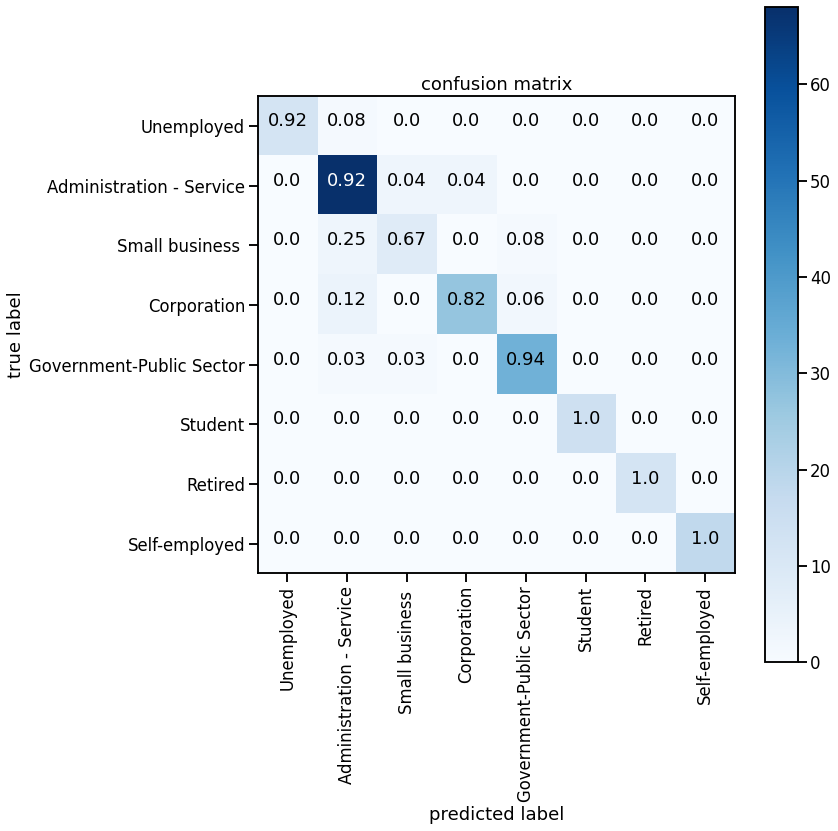

In [38]:
class_names = list(set(df_int['Occupation']))

figure = plt.figure(figsize=(12, 12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# compute labels from normalized confusion matrix
labels_cm = np.around(cm.astype('float') /cm.sum(axis=1)[:, np.newaxis], decimals=2)

# use white text is squares are black, otherwise black
threshold = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color='white' if cm[i, j] > threshold else 'black'
    plt.text(j, i, labels_cm[i, j], horizontalalignment='center', color=color)

plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

# MULTI output neural net

`'Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size'`

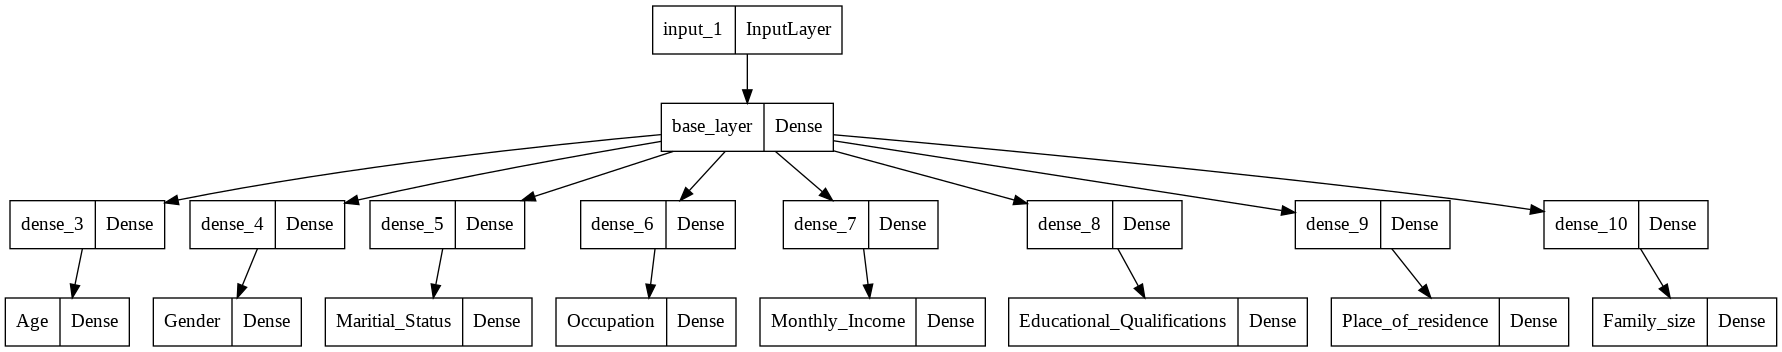

In [39]:
input = tf.keras.layers.Input(shape=(98,))
dense_1 = tf.keras.layers.Dense(128, activation='relu', name='base_layer')(input)

dense_21 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_1 = tf.keras.layers.Dense(6, activation='softmax', name='Age')(dense_21)

dense_22 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_2 = tf.keras.layers.Dense(2, activation='softmax', name='Gender')(dense_22)

dense_23 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_3 = tf.keras.layers.Dense(2, activation='softmax', name='Maritial_Status')(dense_23)

dense_24 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_4 = tf.keras.layers.Dense(8, activation='softmax', name='Occupation')(dense_24)

dense_25 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_5 = tf.keras.layers.Dense(7, activation='softmax', name='Monthly_Income')(dense_25)

dense_26 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_6 = tf.keras.layers.Dense(6, activation='softmax', name='Educational_Qualifications')(dense_26)

dense_27 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_7 = tf.keras.layers.Dense(5, activation='softmax', name='Place_of_residence')(dense_27)

dense_28 = tf.keras.layers.Dense(32, activation='relu')(dense_1)
output_8 = tf.keras.layers.Dense(5, activation='softmax', name='Family_size')(dense_28)



model_multi = tf.keras.Model(inputs=input, outputs=[output_1, output_2, output_3, output_4, output_5, output_6, output_7, output_8])


model_multi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tf.keras.utils.plot_model(model_multi)

In [40]:
history = model_multi.fit(x=train_array, y=labels, epochs=20, validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 3s 51ms/step - loss: 11.4355 - Age_loss: 1.6853 - Gender_loss: 0.5977 - Maritial_Status_loss: 0.6142 - Occupation_loss: 1.9166 - Monthly_Income_loss: 1.8671 - Educational_Qualifications_loss: 1.6592 - Place_of_residence_loss: 1.5836 - Family_size_loss: 1.5118 - Age_accuracy: 0.2401 - Gender_accuracy: 0.7321 - Maritial_Status_accuracy: 0.6885 - Occupation_accuracy: 0.3571 - Monthly_Income_accuracy: 0.2917 - Educational_Qualifications_accuracy: 0.3472 - Place_of_residence_accuracy: 0.3671 - Family_size_accuracy: 0.2758 - val_loss: 10.1145 - val_Age_loss: 1.5393 - val_Gender_loss: 0.5009 - val_Maritial_Status_loss: 0.5571 - val_Occupation_loss: 1.7420 - val_Monthly_Income_loss: 1.7537 - val_Educational_Qualifications_loss: 1.4476 - val_Place_of_residence_loss: 1.1743 - val_Family_size_loss: 1.3995 - val_Age_accuracy: 0.3150 - val_Gender_accuracy: 0.8740 - val_Maritial_Status_accuracy: 0.7717 - val_Occupation_accuracy: 0.4409 - val_Monthl

In [41]:
accuracy = model_multi.evaluate(x=test_array, y=labels_test)

7/7 [==============================] - 0s 3ms/step - loss: 2.1963 - Age_loss: 0.1754 - Gender_loss: 0.2742 - Maritial_Status_loss: 0.1570 - Occupation_loss: 0.3191 - Monthly_Income_loss: 0.3435 - Educational_Qualifications_loss: 0.3078 - Place_of_residence_loss: 0.2924 - Family_size_loss: 0.3269 - Age_accuracy: 0.9289 - Gender_accuracy: 0.9289 - Maritial_Status_accuracy: 0.9431 - Occupation_accuracy: 0.8863 - Monthly_Income_accuracy: 0.8673 - Educational_Qualifications_accuracy: 0.9005 - Place_of_residence_accuracy: 0.9289 - Family_size_accuracy: 0.8957


In [42]:
accuracy[-8:]

[0.928909957408905,
 0.928909957408905,
 0.9431279897689819,
 0.8862559199333191,
 0.8672986030578613,
 0.900473952293396,
 0.928909957408905,
 0.8957346081733704]

In [43]:
np.average(accuracy[-8:])

0.9099526181817055

# Cool PLOTS about everything

In [44]:
hist = history.history
hist.keys()

dict_keys(['loss', 'Age_loss', 'Gender_loss', 'Maritial_Status_loss', 'Occupation_loss', 'Monthly_Income_loss', 'Educational_Qualifications_loss', 'Place_of_residence_loss', 'Family_size_loss', 'Age_accuracy', 'Gender_accuracy', 'Maritial_Status_accuracy', 'Occupation_accuracy', 'Monthly_Income_accuracy', 'Educational_Qualifications_accuracy', 'Place_of_residence_accuracy', 'Family_size_accuracy', 'val_loss', 'val_Age_loss', 'val_Gender_loss', 'val_Maritial_Status_loss', 'val_Occupation_loss', 'val_Monthly_Income_loss', 'val_Educational_Qualifications_loss', 'val_Place_of_residence_loss', 'val_Family_size_loss', 'val_Age_accuracy', 'val_Gender_accuracy', 'val_Maritial_Status_accuracy', 'val_Occupation_accuracy', 'val_Monthly_Income_accuracy', 'val_Educational_Qualifications_accuracy', 'val_Place_of_residence_accuracy', 'val_Family_size_accuracy'])

In [45]:
acc = [i for i in [x for x in hist.keys() if 'accuracy' in x] if 'val' not in i]
val_acc = [i for i in [x for x in hist.keys() if 'accuracy' in x] if 'val' in i]
val_acc

['val_Age_accuracy',
 'val_Gender_accuracy',
 'val_Maritial_Status_accuracy',
 'val_Occupation_accuracy',
 'val_Monthly_Income_accuracy',
 'val_Educational_Qualifications_accuracy',
 'val_Place_of_residence_accuracy',
 'val_Family_size_accuracy']

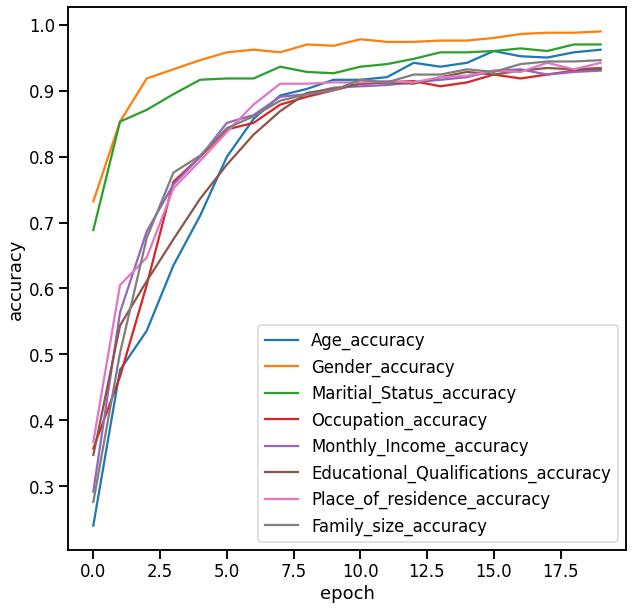

In [46]:
plt.figure(figsize=(10,10))
plt.ylabel('accuracy')
plt.xlabel('epoch')
for i in acc:
    plt.plot(hist[i], label=i)
plt.legend(loc='lower right')
plt.show()

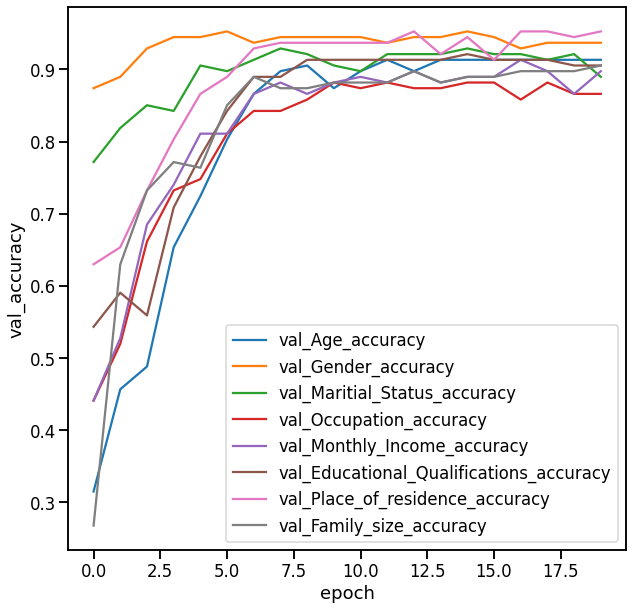

In [47]:
plt.figure(figsize=(10,10))
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
for i in val_acc:
    plt.plot(hist[i], label=i)
plt.legend(loc='lower right')
    
plt.show()

In [48]:
loss = [i for i in [x for x in hist.keys() if 'loss' in x] if 'val' not in i][1:]
val_loss = [i for i in [x for x in hist.keys() if 'loss' in x] if 'val' in i][1:]


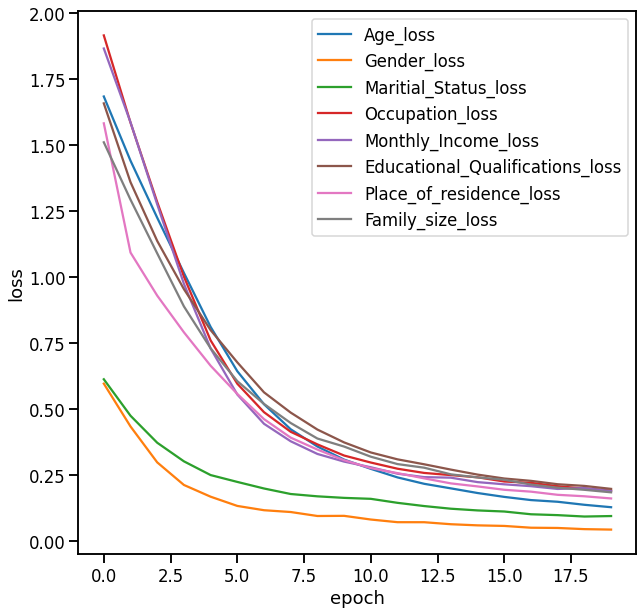

In [49]:
plt.figure(figsize=(10,10))
plt.ylabel('loss')
plt.xlabel('epoch')
for i in loss:
    plt.plot(hist[i], label=i)
plt.legend(loc='upper right')
    
plt.show()

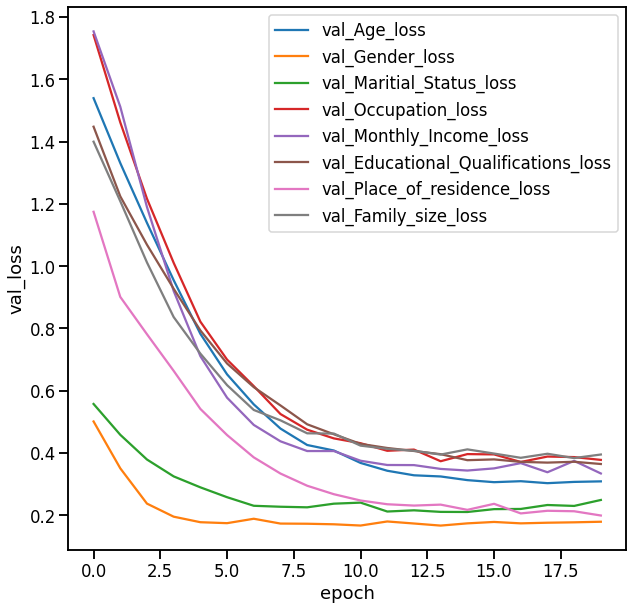

In [50]:
plt.figure(figsize=(10,10))
plt.ylabel('val_loss')
plt.xlabel('epoch')
for i in val_loss:
    plt.plot(hist[i], label=i)
plt.legend(loc='upper right')
    
plt.show()

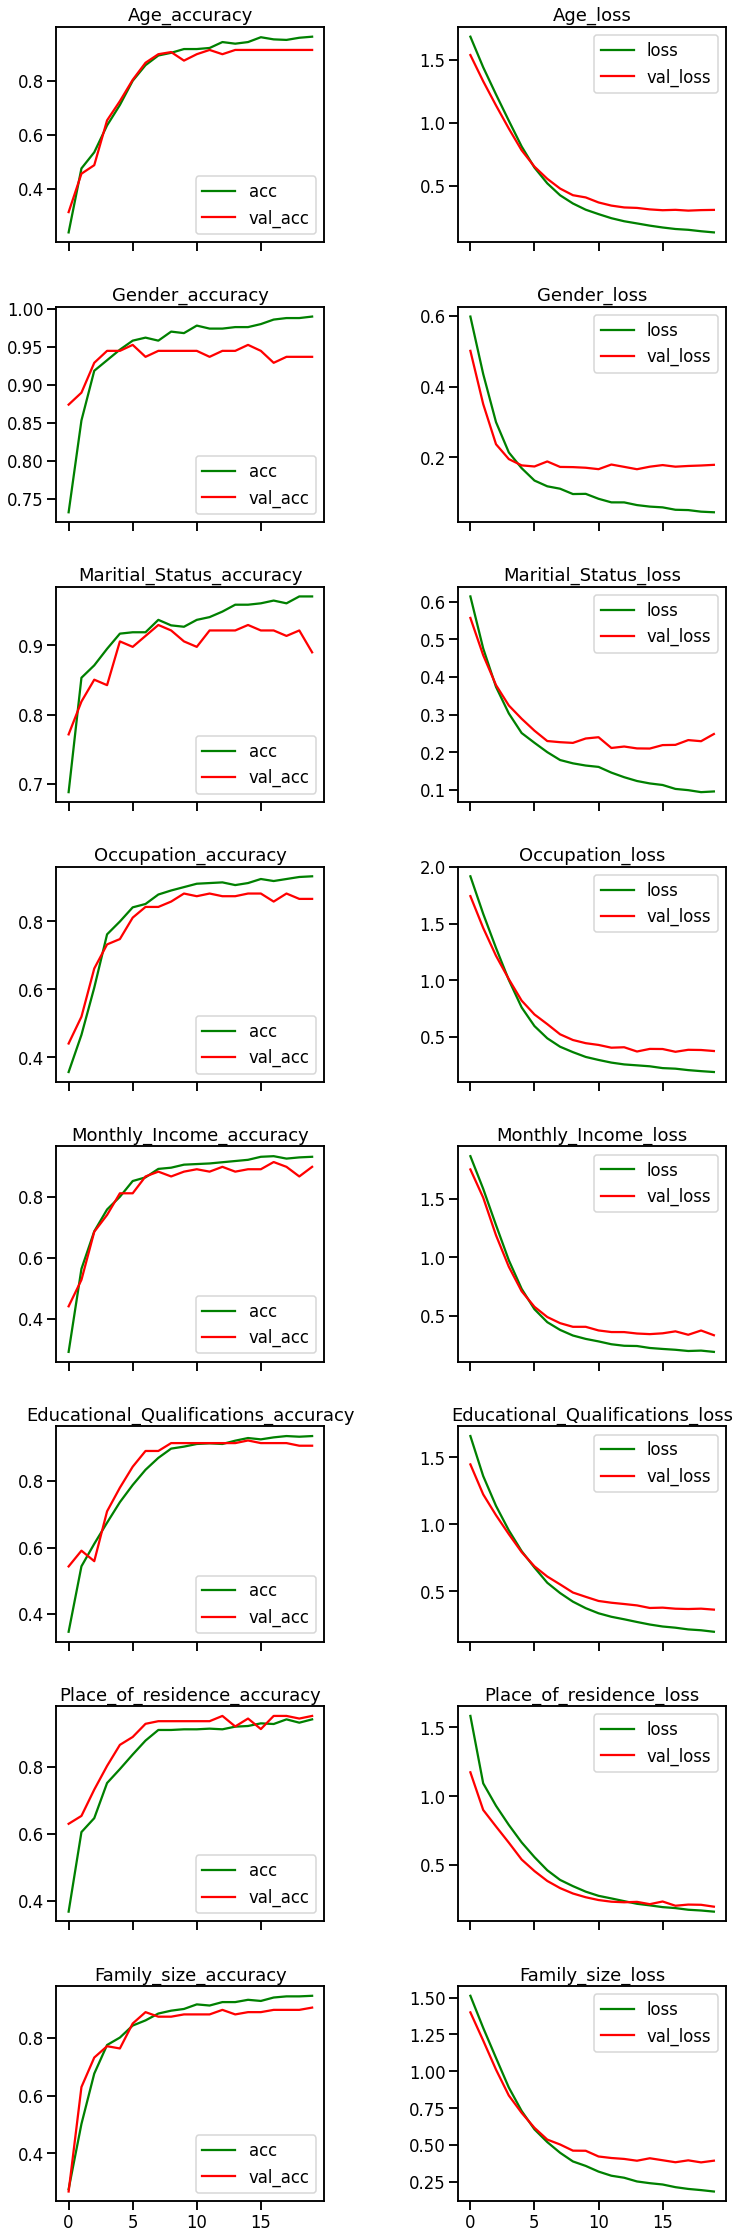

In [51]:
figure, axis = plt.subplots(8, 2, sharex='col',figsize=(12, 40))
figure.subplots_adjust(hspace=0.3, wspace=0.5)

for i in range(8):
    axis[i, 0].plot(hist[acc[i]], label='acc', color = 'g')
    axis[i, 0].plot(hist[val_acc[i]], label='val_acc', color='r')
    axis[i, 0].set_title(acc[i])
    axis[i, 0].legend(loc="lower right")
    
    axis[i, 1].plot(hist[loss[i]], label='loss', color='g')
    axis[i, 1].plot(hist[val_loss[i]], label='val_loss', color='r')
    axis[i, 1].set_title(loss[i])
    axis[i, 1].legend(loc="upper right")
    

# TREE classifiers

### tree

In [52]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [53]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8)

In [54]:
targets = targets_test.keys()
for i in enumerate(targets):
    print(i)

(0, 'Age')
(1, 'Gender')
(2, 'Marital Status')
(3, 'Occupation')
(4, 'Monthly Income')
(5, 'Educational Qualifications')
(6, ' Place of residence')
(7, 'Family size')


In [55]:
category_choice = 'Age'
print(target_categories[category_choice])

i = list(targets_test.keys()).index('Age')

tree = tree.fit(train_array, labels[i])

{'20-29', '30-39', '<20', '50-59', '40-49', '60+'}


In [56]:
# train score
y_pred = tree.predict(train_array)
sklearn.metrics.accuracy_score(labels[i], y_pred)

0.9033280507131537

In [57]:
# test score
y_pred = tree.predict(test_array)
sklearn.metrics.accuracy_score(labels_test[i], y_pred)

0.9052132701421801

### random tree classifier



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
random_tree = RandomForestClassifier(n_estimators=500)

In [60]:
random_tree.fit(train_array, labels[i])

RandomForestClassifier(n_estimators=500)

In [61]:
# train score
y_pred = random_tree.predict(train_array)
sklearn.metrics.accuracy_score(labels[i], y_pred)

1.0

In [62]:
# test score
y_pred = random_tree.predict(test_array)
sklearn.metrics.accuracy_score(labels_test[i], y_pred)

0.9146919431279621

## alternative data preparation for tree classifiers

### tree

In [63]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import preprocessing

In [64]:
t_train, t_test = train_test_split(df_int)

targets_train = {}

for i in ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size']:
    key = i
    targets_train[key]= t_train.pop(i)

targets_test = {}

for i in ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', ' Place of residence', 'Family size']:
    key = i
    targets_test[key]= t_test.pop(i)

In [65]:
for column in t_train.columns:
    t_train[column] = t_train[column].astype('category')
    t_train[column] = t_train[column].cat.codes

In [66]:
for column in t_test.columns:
    t_test[column] = t_test[column].astype('category')
    t_test[column] = t_test[column].cat.codes

In [67]:
t_train.dtypes

BMI - We will calculate and divide into categories                                                                                    int16
Diet - amount of calories                                                                                                              int8
Diet Type                                                                                                                              int8
For which period the order was placedn -order                                                                                          int8
Diet- number of meals                                                                                                                  int8
Motivation to choose a diet                                                                                                            int8
Physical activity                                                                                                                      int8
Special needs       

In [68]:
train_a = np.asarray(t_train)
test_a = np.asarray(t_test)

In [69]:
tree_2 = DecisionTreeClassifier()

In [70]:
tree_2.fit(train_a, targets_train['Age'])

DecisionTreeClassifier()

In [71]:
# train score
y_pred = tree_2.predict(train_a)
sklearn.metrics.accuracy_score(targets_train['Age'], y_pred)

1.0

In [72]:
# test score
y_pred = tree_2.predict(test_a)
sklearn.metrics.accuracy_score(targets_test['Age'], y_pred)

0.6966824644549763

In [73]:
list(set(targets_train['Age']))
list(t_train.keys())

['BMI - We will calculate and divide into categories',
 'Diet - amount of calories',
 'Diet Type ',
 'For which period the order was placedn -order',
 'Diet- number of meals',
 'Motivation to choose a diet',
 'Physical activity',
 'Special needs',
 'Do you find it  cheaper than cooking at home?',
 'Do you find it easier and more convenient than preparing meals at home?',
 'Do you find it a time saving alternative',
 'What type of payment you select?',
 'Do you value more diet offers and flexibility in changing them and are you ready to pay for it ?',
 'Is the food of the same or better quality as in the restaurant?',
 'Do you value  box diet from health concern perspective ?',
 'Do you see problem with  offered delivery times and are you ready to pay for this ?',
 'Do you walue diversity in the menu and you ready to pay for this ?',
 'Do you concider the quality and aesthetics of the packaging and the method of delivery important and are you ready to pay for it ?',
 'Do you value the p

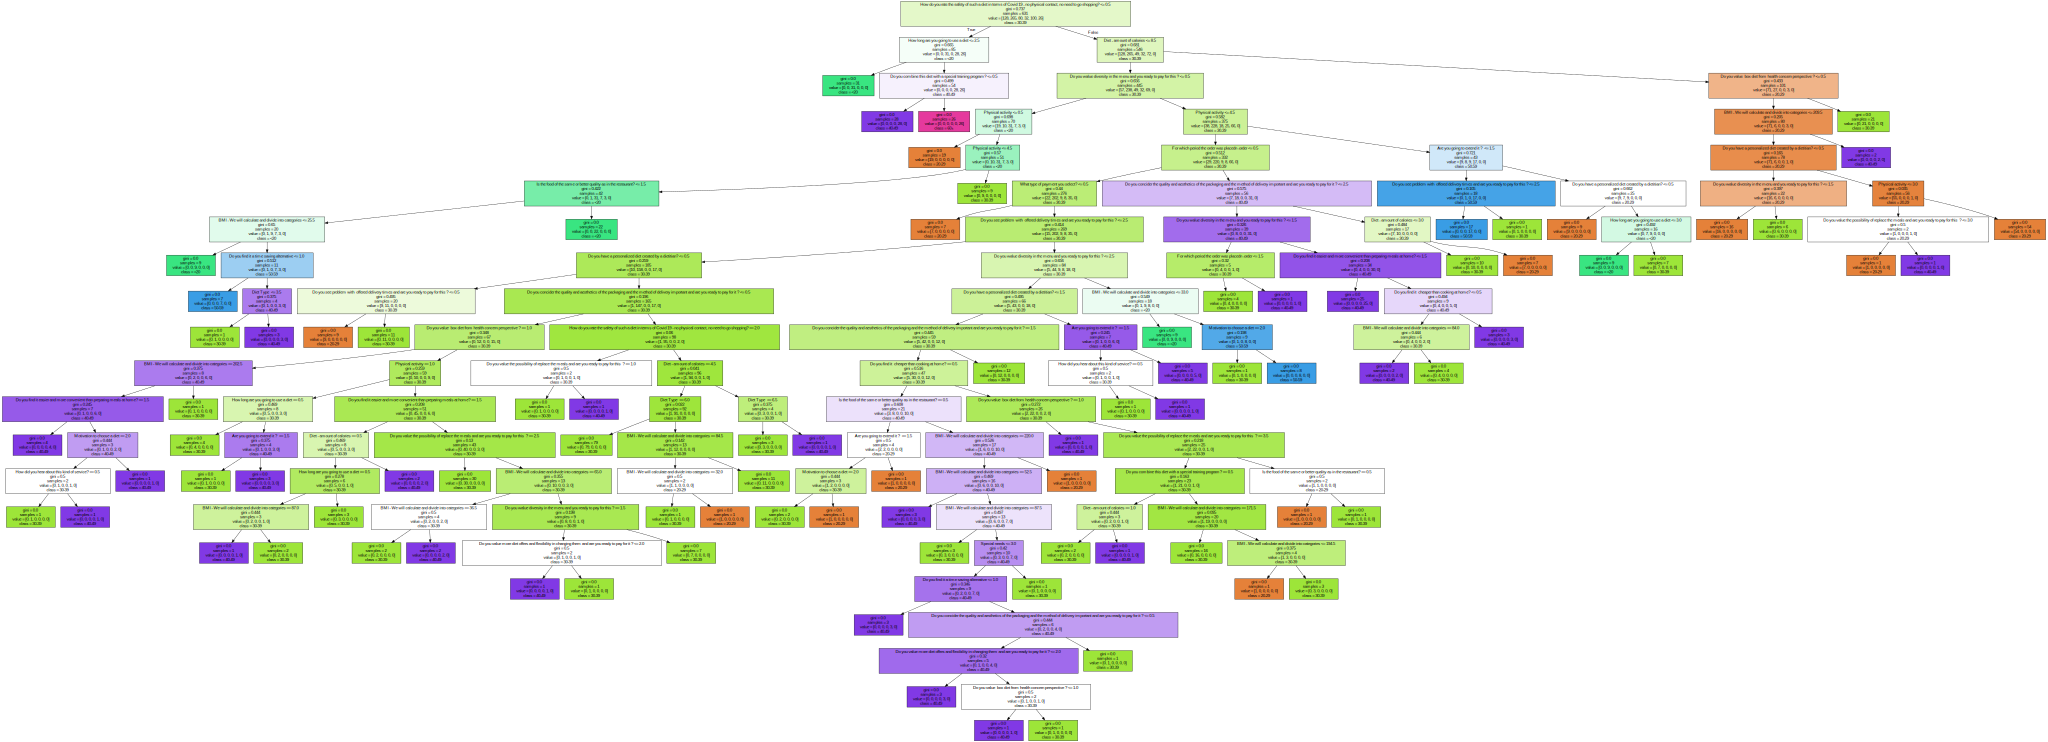

In [74]:
import graphviz


dot_data = export_graphviz(tree_2, out_file=None, 
                                feature_names =list(t_train.keys()),class_names=list(set(targets_train['Age'])),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### random tree

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
random_tree_2 = RandomForestClassifier(n_estimators=500)

In [77]:
random_tree_2.fit(train_a, targets_train['Age'])

RandomForestClassifier(n_estimators=500)

In [78]:
# train score
y_pred = random_tree_2.predict(train_a)
sklearn.metrics.accuracy_score(targets_train['Age'], y_pred)

1.0

In [79]:
# test score
y_pred = random_tree_2.predict(test_a)
sklearn.metrics.accuracy_score(targets_test['Age'], y_pred)

0.8957345971563981

# XGBoost

In [80]:
from xgboost import XGBClassifier
import xgboost as xgb

In [81]:
cat_xgb = 'Age'

targets_xgb_train = targets_train.copy()
targets_xgb_train[cat_xgb] = targets_xgb_train[cat_xgb].astype('category')
targets_xgb_train[cat_xgb] = targets_xgb_train[cat_xgb].cat.codes

targets_xgb_test = targets_test.copy()
targets_xgb_test[cat_xgb] = targets_xgb_test[cat_xgb].astype('category')
targets_xgb_test[cat_xgb] = targets_xgb_test[cat_xgb].cat.codes

targets_xgb_train[cat_xgb]

611    1
397    3
672    1
402    1
128    1
      ..
418    1
764    1
622    4
725    1
516    1
Length: 631, dtype: int8

In [82]:
xgb_cl = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [83]:
xgb_cl.fit(train_a, targets_xgb_train[cat_xgb])

XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [84]:
preds = xgb_cl.predict(train_a)
sklearn.metrics.accuracy_score(targets_xgb_train[cat_xgb], preds)

0.9857369255150554

In [85]:
preds_test = xgb_cl.predict(test_a)
sklearn.metrics.accuracy_score(targets_xgb_test[cat_xgb], preds_test)

0.8672985781990521

In [86]:
features_xgb = {}
for i in enumerate(t_train.keys()):
    features_xgb[i[0]+1] = i[1]

features_xgb    

{1: 'BMI - We will calculate and divide into categories',
 2: 'Diet - amount of calories',
 3: 'Diet Type ',
 4: 'For which period the order was placedn -order',
 5: 'Diet- number of meals',
 6: 'Motivation to choose a diet',
 7: 'Physical activity',
 8: 'Special needs',
 9: 'Do you find it  cheaper than cooking at home?',
 10: 'Do you find it easier and more convenient than preparing meals at home?',
 11: 'Do you find it a time saving alternative',
 12: 'What type of payment you select?',
 13: 'Do you value more diet offers and flexibility in changing them and are you ready to pay for it ?',
 14: 'Is the food of the same or better quality as in the restaurant?',
 15: 'Do you value  box diet from health concern perspective ?',
 16: 'Do you see problem with  offered delivery times and are you ready to pay for this ?',
 17: 'Do you walue diversity in the menu and you ready to pay for this ?',
 18: 'Do you concider the quality and aesthetics of the packaging and the method of delivery imp

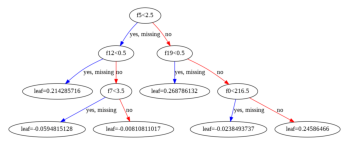

In [87]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [30, 30]

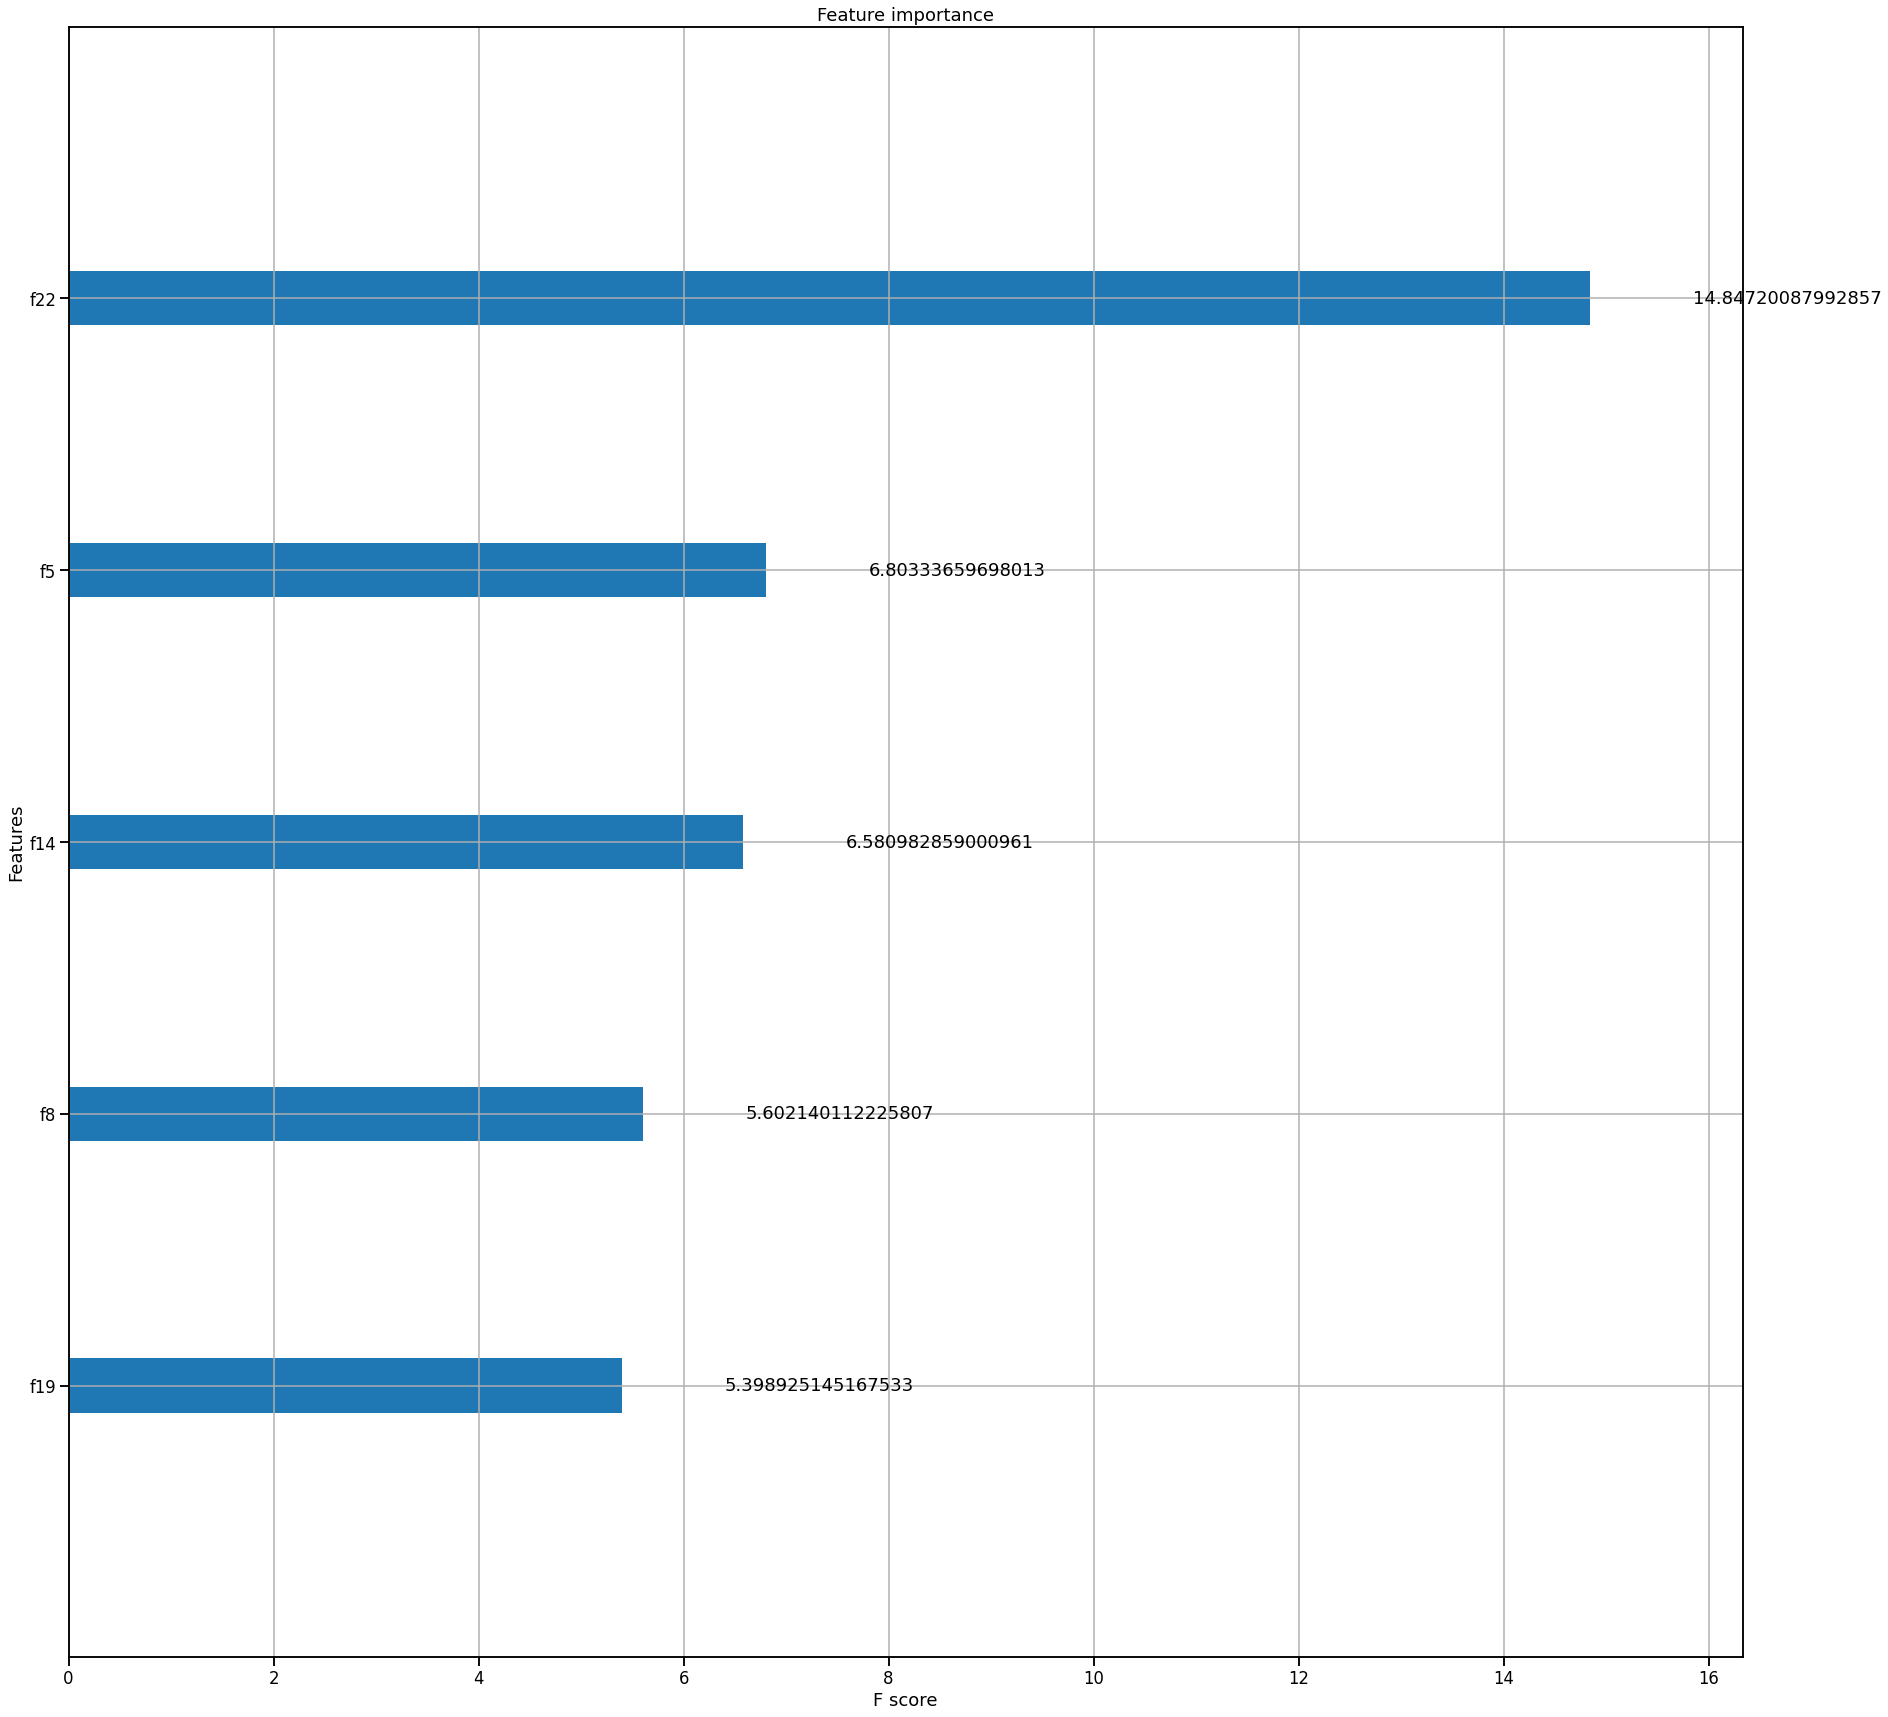

In [88]:
xgb.plot_importance(xgb_cl, max_num_features=5, importance_type='gain', show_values=True) 
plt.rcParams["figure.figsize"] = (8, 8)


In [89]:
print(features_xgb[22])
print(features_xgb[14])
print(features_xgb[1])
print(features_xgb[9])
print(features_xgb[5])

Do you combine this diet with a special training program?
Is the food of the same or better quality as in the restaurant?
BMI - We will calculate and divide into categories
Do you find it  cheaper than cooking at home?
Diet- number of meals
